# Using all the samples to model the Random Forest.

The maximum acurracy is: 100==>0.7104166666666667
The maximum acurracy is: 150==>0.7104166666666667
The maximum acurracy is: 180==>0.7104166666666667
The maximum acurracy is: 280==>0.7104166666666667
MSE: 0.38125


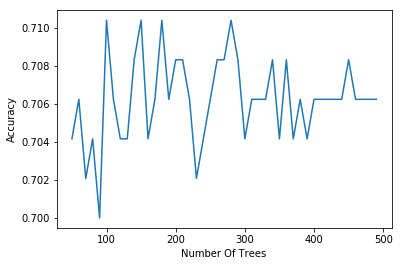

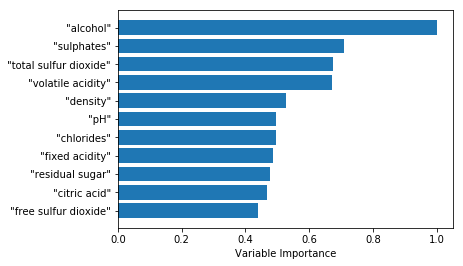

In [4]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

#open the csv document.
data=open("winequality-red.csv")


#read the first row of data which are attributes into list names, then read the rest data into list row, 
#meanwhile, extract the last column of list row, then, put it in the list labels.
xlist=[]
labels=[]
names=[]
firstline=True
for line in data:
    if firstline:
        names=line.strip().split(';')
        firstline=False
    else:
        row=line.strip().split(';')
        labels.append(float(row[-1]))
        row.pop()
        floatrow=[float(num) for num in row]
        xlist.append(floatrow)

#compute size of rows and columns.
nrows=len(xlist)
ncols=len(xlist[1])

#transfer into numpy format.
x=numpy.array(xlist)
y=numpy.array(labels)
winenames=numpy.array(names)

#randomly draw 30% data from the dataset for testing, and set the random_state equals 531.
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=531)

mseoos = []
accuracy = []
#test the accruacy in terms of amounts of trees which range from 50 to 500, and the single step is 10.
ntreelist=range(50,500,10)
dic = {}
for itrees in ntreelist:
    count=0
    depth=None
    maxfeat=4
    #train the Random Forest model.
    winerandomforestmodel=ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain,ytrain)
    prediction=winerandomforestmodel.predict(xtest)
    #put the prediction accuracy into dictionary.
    for i in range(len(prediction)):
        if prediction[i]==ytest[i]:
            count += 1
    accuracy.append((count/len(prediction)))
    dic[itrees] = count/len(prediction)
    mseoos.append(mean_squared_error(ytest,prediction))
for key,value in dic.items():
    if value == max(dic.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos[-1]))
plot.plot(ntreelist,accuracy)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()

#using the feature_importances_ method to extract the numpy of attributes importance.
featureimportance=winerandomforestmodel.feature_importances_
#regularization
featureimportance=featureimportance/featureimportance.max()
#method argsort return the index of array.
sorted_idx=numpy.argsort(featureimportance)
barpos=numpy.arange(sorted_idx.shape[0]) + .5

plot.barh(barpos,featureimportance[sorted_idx],align='center')
plot.yticks(barpos,winenames[sorted_idx])
plot.xlabel("Variable Importance")
plot.show()

# Extracting the first five high importance attributes to model the Random Forest.

The maximum acurracy is: 80==>0.6666666666666666
The maximum acurracy is: 480==>0.6666666666666666
MSE: 0.45416666666666666


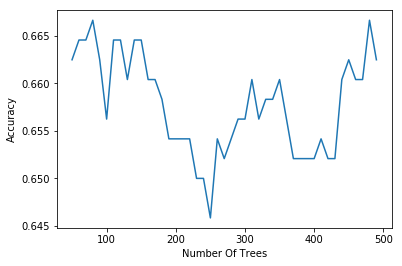

In [7]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot

data1=open("winequality-red.csv")
xlist1 = []
labels1 = []
firstline = True
for line in data1:
    if firstline:
        row=line.strip().split(';')
        firstline = False
    else:
        row=line.strip().split(';')
        labels1.append(float(row[-1]))
        floatrow = [float(row[i]) for i in range(7,11)]
        xlist1.append(floatrow)
x1=numpy.array(xlist1)
y1=numpy.array(labels1)
xtrain1,xtest1,ytrain1,ytest1=train_test_split(x1,y1,test_size=0.30,random_state=531)

ntreelist1=range(50,500,10)
dic1 = {}
accuracy1 = []
mseoos1 = []
for itrees in ntreelist1:
    count=0
    depth=None
    maxfeat=4
    #train the Random Forest model.
    winerandomforestmodel=ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain1,ytrain1)
    #put the prediction accuracy into dictionary.
    prediction=winerandomforestmodel.predict(xtest1)
    for i in range(len(prediction)):
        if prediction[i]==ytest1[i]:
            count += 1
    accuracy1.append((count/len(prediction)))
    dic1[itrees] = count/len(prediction)
    mseoos1.append(mean_squared_error(ytest1,prediction))
for key,value in dic1.items():
    if value == max(dic1.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos1[-1]))

plot.plot(ntreelist1,accuracy1)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()

# Integrate the original 10 classifier into 3 classifier, then backroll the code above.

The maximum acurracy is: 110==>0.9520833333333333
The maximum acurracy is: 120==>0.9520833333333333
The maximum acurracy is: 140==>0.9520833333333333
The maximum acurracy is: 150==>0.9520833333333333
The maximum acurracy is: 160==>0.9520833333333333
The maximum acurracy is: 180==>0.9520833333333333
The maximum acurracy is: 240==>0.9520833333333333
The maximum acurracy is: 250==>0.9520833333333333
The maximum acurracy is: 260==>0.9520833333333333
The maximum acurracy is: 270==>0.9520833333333333
The maximum acurracy is: 280==>0.9520833333333333
The maximum acurracy is: 380==>0.9520833333333333
The maximum acurracy is: 390==>0.9520833333333333
The maximum acurracy is: 400==>0.9520833333333333
The maximum acurracy is: 410==>0.9520833333333333
The maximum acurracy is: 420==>0.9520833333333333
The maximum acurracy is: 430==>0.9520833333333333
The maximum acurracy is: 440==>0.9520833333333333
The maximum acurracy is: 450==>0.9520833333333333
The maximum acurracy is: 460==>0.9520833333333333


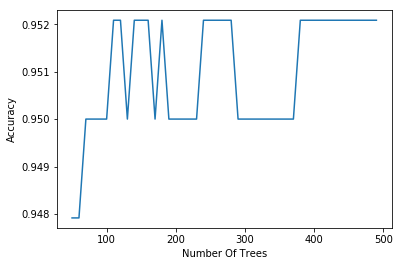

In [3]:
import numpy
import csv
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import pylab as plot


data2=open("winequality-red.csv")
xlist2 = []
labels2 = []
firstline = True
for line in data2:
    if firstline:
        row=line.strip().split(';')
        firstline = False
    else:
        row=line.strip().split(';')
        labels2.append(float(row[-1]))
        floatrow = [float(row[i]) for i in range(6,11)]
        xlist2.append(floatrow)
three_labels = []
for i in labels2:
    if(i<=4):
        i = 1
        three_labels.append(i)
    elif(4<i<=7):
        i = 2
        three_labels.append(i)
    elif(7<i<=10):
        i = 3
        three_labels.append(i)      
x2=numpy.array(xlist2)
y2=numpy.array(three_labels)
xtrain2,xtest2,ytrain2,ytest2=train_test_split(x2,y2,test_size=0.30,random_state=531)

ntreelist2=range(50,500,10)
dic2 = {}
accuracy2 = []
mseoos2 = []
for itrees in ntreelist2:
    count=0
    depth=None
    maxfeat=4
    #train the Random Forest model.
    winerandomforestmodel=ensemble.RandomForestClassifier(n_estimators=itrees,max_depth=depth,max_features=maxfeat,oob_score=False,random_state=531)
    winerandomforestmodel.fit(xtrain2,ytrain2)
    #put the prediction accuracy into dictionary.
    prediction=winerandomforestmodel.predict(xtest2)
    for i in range(len(prediction)):
        if prediction[i]==ytest2[i]:
            count += 1
    accuracy2.append((count/len(prediction)))
    dic2[itrees] = count/len(prediction)
    mseoos2.append(mean_squared_error(ytest2,prediction))
for key,value in dic2.items():
    if value == max(dic2.values()):
        print('The maximum acurracy is: '+ str(key) +'==>'+str(value))
print("MSE: " + str(mseoos[-1]))

plot.plot(ntreelist2,accuracy2)
plot.xlabel("Number Of Trees")
plot.ylabel("Accuracy")
plot.show()